In [21]:
import pandas as pd

In [26]:
df_train =  pd.read_csv('train.csv')
df_train.shape

(1460, 81)

In [27]:
df_test =  pd.read_csv('test.csv')
df_test.shape

(1459, 80)

In [28]:
df1 = pd.read_csv('final_train.csv')
df1.shape

(1456, 242)

In [29]:
df = pd.read_csv('final_test.csv')
df.shape

(1459, 241)

In [32]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

np.random.seed(1) # for reprodusability of results

In [33]:
df = pd.read_csv('train.csv')

In [34]:
# 0's for quantitative features
df[['LotFrontage']] = df[['LotFrontage']].fillna(0)
df[['MasVnrArea']] = df[['MasVnrArea']].fillna(0)
# df[['BsmtUnfSF ']] = df[['BsmtUnfSF ']].fillna(0)
df[['BsmtFullBath']] = df[['BsmtFullBath']].fillna(0)
df[['BsmtHalfBath']] = df[['BsmtHalfBath']].fillna(0)
df[['FullBath']] = df[['FullBath']].fillna(0)
df[['FullBath']] = df[['FullBath']].fillna(0)
df[['GarageCars']] = df[['GarageCars']].fillna(0)
df[['BsmtFinSF1']] = df[['BsmtFinSF1']].fillna(0)
df[['BsmtFinSF2']] = df[['BsmtFinSF2']].fillna(0)
df[['BsmtUnfSF']] = df[['BsmtUnfSF']].fillna(0)
df[['TotalBsmtSF']] = df[['TotalBsmtSF']].fillna(0)
df[['GarageArea']] = df[['GarageArea']].fillna(0)

# Most frequent for categorical
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df[['Electrical']])
df[['Electrical']] = pd.DataFrame(imp.transform(df[['Electrical']]), columns = ['Electrical'])
imp.fit(df[['Functional']])
df[['Functional']] = pd.DataFrame(imp.transform(df[['Functional']]), columns = ['Functional'])
imp.fit(df[['KitchenQual']])
df[['KitchenQual']] = pd.DataFrame(imp.transform(df[['KitchenQual']]), columns = ['KitchenQual'])
imp.fit(df[['MSZoning']])
df[['MSZoning']] = pd.DataFrame(imp.transform(df[['MSZoning']]), columns = ['MSZoning'])
imp.fit(df[['Exterior1st']])
df[['Exterior1st']] = pd.DataFrame(imp.transform(df[['Exterior1st']]), columns = ['Exterior1st'])
imp.fit(df[['Exterior2nd']])
df[['Exterior2nd']] = pd.DataFrame(imp.transform(df[['Exterior2nd']]), columns = ['Exterior2nd'])
imp.fit(df[['Utilities']])
df[['Utilities']] = pd.DataFrame(imp.transform(df[['Utilities']]), columns = ['Utilities'])
imp.fit(df[['SaleType']])
df[['SaleType']] = pd.DataFrame(imp.transform(df[['SaleType']]), columns = ['SaleType'])

# None for MasVnrType since it might mean there's no mass veneer:
df[['MasVnrType']] = df[['MasVnrType']].fillna('None')

# Ordinal
df[['Alley']] = df[['Alley']].fillna('None')
df[['BsmtQual']] = df[['BsmtQual']].fillna('None')
df[['BsmtCond']] = df[['BsmtCond']].fillna('None')
df[['BsmtExposure']] = df[['BsmtExposure']].fillna('None')
df[['BsmtFinType1']] = df[['BsmtFinType1']].fillna('None')
df[['BsmtFinType2']] = df[['BsmtFinType2']].fillna('None')
df[['FireplaceQu']] = df[['FireplaceQu']].fillna('None')
df[['GarageType']] = df[['GarageType']].fillna('None')
df[['GarageFinish']] = df[['GarageFinish']].fillna('None')
df[['GarageQual']] = df[['GarageQual']].fillna('None')
df[['GarageCond']] = df[['GarageCond']].fillna('None')
df[['PoolQC']] = df[['PoolQC']].fillna('None')
df[['Fence']] = df[['Fence']].fillna('None')
df[['MiscFeature']] = df[['MiscFeature']].fillna('None')

# GarageYrBlt NA's replaced with year the house built
df.loc[df['GarageYrBlt'].isnull() == True, 'GarageYrBlt'] = df.loc[df['GarageYrBlt'].isnull() == True, 'YearBuilt']

In [35]:
quality_scale = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
basement_scale = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}

df = df.replace({'HeatingQC': quality_scale,
                 'KitchenQual': quality_scale,
                 'ExterQual': quality_scale,
                 'ExterCond': quality_scale,
                 'BsmtQual': quality_scale,
                 'BsmtCond': quality_scale,
                 'FireplaceQu': quality_scale,
                 'GarageQual': quality_scale,
                 'GarageCond': quality_scale,
                 'BsmtFinType1': basement_scale,
                 'BsmtFinType2': basement_scale,
                 'PoolQC': quality_scale,
                 'BsmtExposure': {'None': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
                 'GarageFinish:': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3},
                 'Fence': {'None': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4},
                 #Converting numerical to categorical
                 'MSSubClass': {20: 'SC20', 30: 'SC30', 40: 'SC40', 45: 'SC45', 50: 'SC50', 60: 'SC60', 70: 'SC70', 
                                75: 'SC75', 80: 'SC80', 85: 'SC85', 90: 'SC90', 120: 'SC120', 150: 'SC150', 160: 'SC160',
                                180: 'SC180', 190: 'SC190'},
                 'PavedDrive': {'N': 0, 'Y': 2, 'P': 1},
                 'Functional': {'Sal': 1, 'Sev': 2, 'Maj2': 3, 'Maj1': 4, 
                                'Mod': 5, 'Min2': 6, 'Min1': 7, 'Typ': 8},
                 'MoSold': {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 
                            7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}          
})

# Rename one 'MSZoning' value
df.loc[(df['MSZoning'] == 'C (all)'), 'MSZoning'] = 'C'

# Convert CentralAit to binary
df['CentralAir'] = (df['CentralAir'] != 'N').astype(int)

In [36]:
# Total porch area
df['Total.Porch']= df['OpenPorchSF'] + df['EnclosedPorch'] + df['ScreenPorch']

# Total floor area
df['TotalFlSF'] = df['1stFlrSF'] + df['2ndFlrSF'] + df['LowQualFinSF']

# Total rooms
df['TotRmsAbvGrd'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr']

# Total baths
df['Total.HalfBath'] = df['BsmtFullBath'] + df['FullBath']
df['Total.FullBath'] = df['BsmtHalfBath'] + df['HalfBath']

# Subtracting num of bedrooms from total number of rooms as bedrooms are represented in a separate feature
df['Total.RmsAbvGrd'] = df['TotRmsAbvGrd'] - df['BedroomAbvGr']

# Combining condition parameters
df['OverallScore'] = df['OverallQual'] * df['OverallCond']
df['ExterScore'] = df['ExterQual'] * df['ExterCond']
df['BsmtScore'] = df['BsmtQual'] * df['BsmtCond']
df['KitchenScore'] = df['KitchenAbvGr'] * df['KitchenQual']
df['GarageScore'] = df['GarageArea'] * df['GarageQual']

In [37]:
categorical_features = df.select_dtypes(include = ["object"]).columns
numerical_features = df.select_dtypes(exclude = ["object"]).columns

In [38]:
categorical_features

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'GarageFinish', 'MiscFeature', 'MoSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

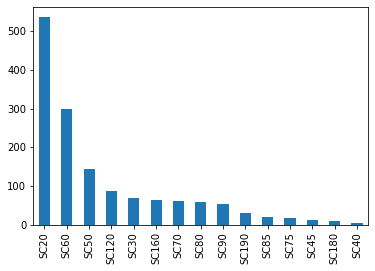

In [39]:
df['MSSubClass'].value_counts().plot.bar()